# Estadística Descriptiva Dataset de KPI

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('notebook')
plt.rcParams['figure.dpi'] = 150

In [3]:
df = pd.read_csv("C:/Users/admin\Desktop/Correcciones/df_kpi_modelo (1).csv")

df.head()

,Date,Month,Accion,EV / Free Cashflow,EV / EBITDA,EV / Revenue,Total Liabilities / Total Assets,Long Term Liabilities / Total Assets,ROIC,Total Current Liabilities / Total Liabilities,ROE,PER,Sector,Year
0,2023-01-31,1,A,193.295985,84.711388,24.217037,0.486308,0.309003,0.059345,0.364595,0.062756,97.384527,Healthcare,2023
1,2022-10-31,10,A,121.312329,83.223340,24.800465,0.496297,0.319597,0.068081,0.356036,0.069369,102.651304,Healthcare,2022
2,2022-07-31,7,A,154.971508,76.235984,22.009923,0.514403,0.332984,0.060064,0.352679,0.064624,92.015468,Healthcare,2022
3,2022-04-30,4,A,168.533269,84.653179,22.967508,0.510091,0.336681,0.051906,0.339959,0.053495,104.483044,Healthcare,2022
4,2022-01-31,1,A,227.796205,97.164258,24.494216,0.500920,0.347536,0.050550,0.306205,0.054909,113.963344,Healthcare,2022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19650 entries, 0 to 19649
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           19650 non-null  object 
 1   Month                                          19650 non-null  int64  
 2   Accion                                         19650 non-null  object 
 3   EV / Free Cashflow                             19650 non-null  float64
 4   EV / EBITDA                                    19650 non-null  float64
 5   EV / Revenue                                   19650 non-null  float64
 6   Total Liabilities / Total Assets               19650 non-null  float64
 7   Long Term Liabilities / Total Assets           19650 non-null  float64
 8   ROIC                                           19650 non-null  float64
 9   Total Current Liabilities / Total Liabilities  196

Hacer el análisis  descripción de las variables del dataset, (así como lo pedía Dolores al inicio de cada actividad).

* Variables cualitativas.
  * Cualitativas ordinales: En este dataset no hay variables cualitaticas ordinales.
  * Cualitativas nominales: Sector, Accion (Acción).
  * Cualitativas binarias: En este dataset no hay variables cualitativas binarias.

* Variables cuantitativas.
  * Cuantitativas discretas: Year (Año), Month (Mes).
  * Cuantitativas continuas: EV / Free Cashflow, EV / EBITDA, EV / Revenue, Total Liabilities / Total Assets, Long Term Liabilities / Total Assets, ROIC, Total Current Liabilities / Total Liabilities, ROE, PER.

## Estadística Unidimensional

### Evaluación de valores anómalos en el dataset

In [5]:
columnas_numericas = ['Month', 'EV / Free Cashflow', 'EV / EBITDA',
       'EV / Revenue', 'Total Liabilities / Total Assets',
       'Long Term Liabilities / Total Assets', 'ROIC',
       'Total Current Liabilities / Total Liabilities', 'ROE', 'PER', 'Year']

df[columnas_numericas].max(axis=0).reset_index(name="Valor Máximo")

,index,Valor Máximo
0,Month,1.200000e+01
1,EV / Free Cashflow,inf
2,EV / EBITDA,inf
3,EV / Revenue,1.222025e+04
4,Total Liabilities / Total Assets,1.907114e+00
5,Long Term Liabilities / Total Assets,1.534878e+00
6,ROIC,9.060000e+02
7,Total Current Liabilities / Total Liabilities,1.000296e+00
8,ROE,5.366667e+01
9,PER,inf


Como se observa, existen valores infinitos en 3 variables del dataset, lo cual debe modificarse. Para estos, los valores `inf` del dataset serán sustituidos con la media de su respectiva variable.

In [6]:
# EV / Free Cashflow 

df.loc[df['EV / Free Cashflow'] == np.inf, ['Accion', 'Date', 'EV / Free Cashflow']]

,Accion,Date,EV / Free Cashflow
7907,HII,2013-06-30,inf
12595,NOC,1997-03-31,inf


In [7]:
# Imputación valores np.inf con la media de EV / Free Cashflow 

mean_EV_Free_Cashflow = df.loc[df['EV / Free Cashflow'] != np.inf, 'EV / Free Cashflow'].mean()
df.loc[df['EV / Free Cashflow'] == np.inf, 'EV / Free Cashflow'] = mean_EV_Free_Cashflow

# Verificación de la imputación

df.loc[df['EV / Free Cashflow'] == np.inf, ['Accion', 'Date', 'EV / Free Cashflow']]

,Accion,Date,EV / Free Cashflow


In [8]:
# EV / EBITDA

df.loc[df['EV / EBITDA'] == np.inf, ['Accion', 'Date', 'EV / EBITDA']]

,Accion,Date,EV / EBITDA
4732,DAL,2010-03-31,inf


In [9]:
# Imputación valores np.inf con la media de EV / EBITDA 

mean_EV_revenue = df.loc[df['EV / EBITDA'] != np.inf, 'EV / EBITDA'].mean()
df.loc[df['EV / EBITDA'] == np.inf, 'EV / EBITDA'] = mean_EV_revenue

# Verificación de la imputación

df.loc[df['EV / EBITDA'] == np.inf, ['Accion', 'Date', 'EV / EBITDA']]

,Accion,Date,EV / EBITDA


In [10]:
# PER

df.loc[df['PER'] == np.inf, ['Accion', 'Date', 'PER']]

,Accion,Date,PER
10546,LMT,1999-03-31,inf
18272,URI,2009-09-30,inf
19167,WM,2000-06-30,inf


In [11]:
# Imputación valores np.inf con la media de PER

mean_PER = df.loc[df['PER'] != np.inf, 'PER'].mean()
df.loc[df['PER'] == np.inf, 'PER'] = mean_PER

# Verificación de la imputación

df.loc[df['PER'] == np.inf, ['Accion', 'Date', 'PER']]

,Accion,Date,PER


In [12]:
df[columnas_numericas].max(axis=0).reset_index(name="Valor Máximo")

,index,Valor Máximo
0,Month,12.000000
1,EV / Free Cashflow,241799.609086
2,EV / EBITDA,137684.613157
3,EV / Revenue,12220.253427
4,Total Liabilities / Total Assets,1.907114
5,Long Term Liabilities / Total Assets,1.534878
6,ROIC,906.000000
7,Total Current Liabilities / Total Liabilities,1.000296
8,ROE,53.666667
9,PER,138754.650639


### Tablas de Frecuencias Variables Cualitativas

In [13]:
def tabla_frecuencias_discretas(variable):

    """Recibe como parámetro una Series de pandas y regresa un dataframe de pandas con las frecuencias de la variable cualitativa"""

    tf = variable.value_counts().reset_index(name='Frecuencia')
    tf['Frecuencia Acumulada'] = tf['Frecuencia'].cumsum()
    tf['Frecuencia Relativa'] = round(tf['Frecuencia'] / tf['Frecuencia'].sum(), 4)
    tf['Frecuencia Relativa Acumulada'] = round((tf['Frecuencia'] / tf['Frecuencia'].sum()).cumsum(), 4)

    return tf

In [14]:
# Tabla de frecuencias de la variable Sector

tabla_frecuencias_discretas(df['Sector'])

,Sector,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,Industrials,5753,5753,0.2928,0.2928
1,Technology,3763,9516,0.1915,0.4843
2,Healthcare,3097,12613,0.1576,0.6419
3,Consumer Defensive,2769,15382,0.1409,0.7828
4,Utilities,2583,17965,0.1315,0.9142
5,Communication Services,1209,19174,0.0615,0.9758
6,Real Estate,476,19650,0.0242,1.0000


In [15]:
# Tabla de frecuencias de la variable Accion (primeros 10 registros)

tabla_frecuencias_discretas(df['Accion']).head(10)

,Accion,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,MSFT,119,119,0.0061,0.0061
1,CAH,119,238,0.0061,0.0121
2,FDX,119,357,0.0061,0.0182
3,IBM,118,475,0.0060,0.0242
4,KMB,118,593,0.0060,0.0302
5,BDX,118,711,0.0060,0.0362
6,COO,118,829,0.0060,0.0422
7,LMT,118,947,0.0060,0.0482
8,HPQ,118,1065,0.0060,0.0542
9,ADSK,117,1182,0.0060,0.0602


In [16]:
# Tabla de frecuencias de la variable Accion (últimos 10 registros)

tabla_frecuencias_discretas(df['Accion']).tail(10)

,Accion,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
207,DXC,24,19533,0.0012,0.9940
208,EVRG,21,19554,0.0011,0.9951
209,CI,19,19573,0.0010,0.9961
210,FOXA,14,19587,0.0007,0.9968
211,FOX,14,19601,0.0007,0.9975
212,OTIS,13,19614,0.0007,0.9982
213,CARR,13,19627,0.0007,0.9988
214,GE,11,19638,0.0006,0.9994
215,OGN,8,19646,0.0004,0.9998
216,VTR,4,19650,0.0002,1.0000


### Tabla de Frecuencia de Variables Cuantitativas

#### Variables Cuantitativas Discretas

In [17]:
# Tabla de frecuencias de la variable Month (Mes)

tabla_frecuencias_discretas(df['Month'])

,Month,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,12,4224,4224,0.2150,0.2150
1,3,4017,8241,0.2044,0.4194
2,9,3967,12208,0.2019,0.6213
3,6,3867,16075,0.1968,0.8181
4,4,676,16751,0.0344,0.8525
5,7,583,17334,0.0297,0.8821
6,1,540,17874,0.0275,0.9096
7,10,477,18351,0.0243,0.9339
8,5,357,18708,0.0182,0.9521
9,8,327,19035,0.0166,0.9687


In [18]:
tabla_frecuencias_discretas(df['Year'])

,Year,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,2021,850,850,0.0433,0.0433
1,2022,847,1697,0.0431,0.0864
2,2019,844,2541,0.0430,0.1293
3,2020,841,3382,0.0428,0.1721
4,2018,828,4210,0.0421,0.2142
5,2017,811,5021,0.0413,0.2555
6,2016,801,5822,0.0408,0.2963
7,2015,792,6614,0.0403,0.3366
8,2014,792,7406,0.0403,0.3769
9,2013,791,8197,0.0403,0.4172


#### Variables Cuantitativas Continuas

In [19]:
# Elección del número de Clases (Regla de Sturges)

n_clases = round(1 + 3.22 * np.log10(df.shape[0]))
n_clases

15

In [20]:
def tabla_frecuencias_continuas(variable, clases):
 
    """Recibe como parámetro una Series de pandas y regresa un dataframe de pandas con las frecuencias de la variable cuantitativa"""

    intervalos = np.linspace(variable.min(), variable.max() + 0.01, clases + 1).tolist()
    
    tf = pd.cut(variable, bins=intervalos, right=False).value_counts().reset_index(name="Frecuencia")
    tf = tf.sort_values(tf.columns[0])
    tf["Frecuencia Acumulada"] = tf["Frecuencia"].cumsum()
    tf['Frecuencia Relativa'] = round(tf['Frecuencia'] / tf['Frecuencia'].sum(), 5)
    tf['Frecuencia Relativa Acumulada'] = round((tf['Frecuencia'] / tf['Frecuencia'].sum()).cumsum(), 5)

    return tf

In [21]:
tabla_frecuencias_continuas(df["EV / Free Cashflow"], n_clases)

,EV / Free Cashflow,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
4,"[-617621.61, -560326.861)",1,1,0.00005,0.00005
6,"[-560326.861, -503032.112)",0,1,0.00000,0.00005
7,"[-503032.112, -445737.364)",0,1,0.00000,0.00005
8,"[-445737.364, -388442.615)",0,1,0.00000,0.00005
9,"[-388442.615, -331147.867)",0,1,0.00000,0.00005
10,"[-331147.867, -273853.118)",0,1,0.00000,0.00005
11,"[-273853.118, -216558.37)",0,1,0.00000,0.00005
12,"[-216558.37, -159263.621)",0,1,0.00000,0.00005
13,"[-159263.621, -101968.872)",0,1,0.00000,0.00005
2,"[-101968.872, -44674.124)",2,3,0.00010,0.00015


In [22]:
tabla_frecuencias_continuas(df["EV / EBITDA"], n_clases)

,EV / EBITDA,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
3,"[-28837.908, -17736.406)",3,3,0.00015,0.00015
4,"[-17736.406, -6634.904)",1,4,0.00005,0.00020
0,"[-6634.904, 4466.598)",19636,19640,0.99929,0.99949
1,"[4466.598, 15568.1)",5,19645,0.00025,0.99975
2,"[15568.1, 26669.602)",4,19649,0.00020,0.99995
6,"[26669.602, 37771.104)",0,19649,0.00000,0.99995
7,"[37771.104, 48872.606)",0,19649,0.00000,0.99995
8,"[48872.606, 59974.108)",0,19649,0.00000,0.99995
9,"[59974.108, 71075.611)",0,19649,0.00000,0.99995
10,"[71075.611, 82177.113)",0,19649,0.00000,0.99995


In [23]:
tabla_frecuencias_continuas(df["EV / Revenue"], n_clases)

,EV / Revenue,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,"[-689.83, 170.843)",19628,19628,0.99888,0.99888
1,"[170.843, 1031.516)",20,19648,0.00102,0.99990
4,"[1031.516, 1892.189)",0,19648,0.00000,0.99990
5,"[1892.189, 2752.862)",0,19648,0.00000,0.99990
6,"[2752.862, 3613.535)",0,19648,0.00000,0.99990
7,"[3613.535, 4474.208)",0,19648,0.00000,0.99990
8,"[4474.208, 5334.88)",0,19648,0.00000,0.99990
9,"[5334.88, 6195.553)",0,19648,0.00000,0.99990
10,"[6195.553, 7056.226)",0,19648,0.00000,0.99990
11,"[7056.226, 7916.899)",0,19648,0.00000,0.99990


In [24]:
tabla_frecuencias_continuas(df["Total Liabilities / Total Assets"], n_clases)

,Total Liabilities / Total Assets,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
10,"[-0.936, -0.746)",3,3,0.00015,0.00015
11,"[-0.746, -0.555)",0,3,0.00000,0.00015
12,"[-0.555, -0.365)",0,3,0.00000,0.00015
13,"[-0.365, -0.175)",0,3,0.00000,0.00015
14,"[-0.175, 0.0152)",0,3,0.00000,0.00015
4,"[0.0152, 0.205)",653,656,0.03323,0.03338
3,"[0.205, 0.396)",2222,2878,0.11308,0.14646
1,"[0.396, 0.586)",5534,8412,0.28163,0.42809
0,"[0.586, 0.776)",7883,16295,0.40117,0.82926
2,"[0.776, 0.966)",2557,18852,0.13013,0.95939


In [25]:
tabla_frecuencias_continuas(df["Long Term Liabilities / Total Assets"], n_clases)

,Long Term Liabilities / Total Assets,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
10,"[-0.995, -0.826)",3,3,0.00015,0.00015
11,"[-0.826, -0.657)",0,3,0.00000,0.00015
12,"[-0.657, -0.487)",0,3,0.00000,0.00015
13,"[-0.487, -0.318)",0,3,0.00000,0.00015
14,"[-0.318, -0.149)",0,3,0.00000,0.00015
4,"[-0.149, 0.0207)",793,796,0.04036,0.04051
3,"[0.0207, 0.19)",3056,3852,0.15552,0.19603
0,"[0.19, 0.359)",5662,9514,0.28814,0.48417
1,"[0.359, 0.529)",5066,14580,0.25781,0.74198
2,"[0.529, 0.698)",4200,18780,0.21374,0.95573


In [26]:
tabla_frecuencias_continuas(df["ROIC"], n_clases)

,ROIC,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
2,"[-232.0, -156.133)",1,1,0.00005,0.00005
5,"[-156.133, -80.265)",0,1,0.00000,0.00005
1,"[-80.265, -4.398)",16,17,0.00081,0.00087
0,"[-4.398, 71.469)",19631,19648,0.99903,0.99990
6,"[71.469, 147.337)",0,19648,0.00000,0.99990
3,"[147.337, 223.204)",1,19649,0.00005,0.99995
7,"[223.204, 299.071)",0,19649,0.00000,0.99995
8,"[299.071, 374.939)",0,19649,0.00000,0.99995
9,"[374.939, 450.806)",0,19649,0.00000,0.99995
10,"[450.806, 526.673)",0,19649,0.00000,0.99995


In [27]:
tabla_frecuencias_continuas(df["Total Current Liabilities / Total Liabilities"], n_clases)

,Total Current Liabilities / Total Liabilities,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
14,"[-0.0872, -0.014)",3,3,0.00015,0.00015
13,"[-0.014, 0.0592)",125,128,0.00636,0.00651
6,"[0.0592, 0.132)",1250,1378,0.06361,0.07013
1,"[0.132, 0.205)",2695,4073,0.13715,0.20728
3,"[0.205, 0.279)",2374,6447,0.12081,0.32809
2,"[0.279, 0.352)",2558,9005,0.13018,0.45827
0,"[0.352, 0.425)",2705,11710,0.13766,0.59593
4,"[0.425, 0.498)",2063,13773,0.10499,0.70092
5,"[0.498, 0.571)",1364,15137,0.06941,0.77033
7,"[0.571, 0.644)",1049,16186,0.05338,0.82372


In [28]:
tabla_frecuencias_continuas(df["ROE"], n_clases)

,ROE,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
7,"[-70.333, -62.066)",1,1,0.00005,0.00005
8,"[-62.066, -53.799)",1,2,0.00005,0.00010
9,"[-53.799, -45.531)",1,3,0.00005,0.00015
12,"[-45.531, -37.264)",0,3,0.00000,0.00015
5,"[-37.264, -28.997)",2,5,0.00010,0.00025
4,"[-28.997, -20.729)",4,9,0.00020,0.00046
10,"[-20.729, -12.462)",1,10,0.00005,0.00051
1,"[-12.462, -4.195)",27,37,0.00137,0.00188
0,"[-4.195, 4.073)",19584,19621,0.99664,0.99852
2,"[4.073, 12.34)",21,19642,0.00107,0.99959


In [29]:
tabla_frecuencias_continuas(df["PER"], n_clases)

,PER,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
6,"[-111423.691, -94745.134)",1,1,0.00005,0.00005
8,"[-94745.134, -78066.578)",0,1,0.00000,0.00005
9,"[-78066.578, -61388.021)",0,1,0.00000,0.00005
10,"[-61388.021, -44709.464)",0,1,0.00000,0.00005
4,"[-44709.464, -28030.907)",2,3,0.00010,0.00015
2,"[-28030.907, -11352.35)",6,9,0.00031,0.00046
0,"[-11352.35, 5326.206)",19625,19634,0.99873,0.99919
1,"[5326.206, 22004.763)",10,19644,0.00051,0.99969
3,"[22004.763, 38683.32)",3,19647,0.00015,0.99985
5,"[38683.32, 55361.877)",2,19649,0.00010,0.99995


### Tabla de Percentiles - Índices

Dado a la presencia de valores extremos en los índices calculados, se realizará una tabla de percentiles para ver el rango de cada índice donde se encuentra la mayoría de sus registros.

In [30]:
indices = ['EV / Free Cashflow', 'EV / EBITDA',
       'EV / Revenue', 'Total Liabilities / Total Assets',
       'Long Term Liabilities / Total Assets', 'ROIC',
       'Total Current Liabilities / Total Liabilities', 'ROE', 'PER']

percentiles = pd.DataFrame()

percentiles['Percentil'] = [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 96, 97, 98, 99, 100]

for indice in indices: 

    percentiles[indice] = np.percentile(df[indice], percentiles['Percentil'])

percentiles.set_index("Percentil", inplace=True)

percentiles

,EV / Free Cashflow,EV / EBITDA,EV / Revenue,Total Liabilities / Total Assets,Long Term Liabilities / Total Assets,ROIC,Total Current Liabilities / Total Liabilities,ROE,PER
Percentil,,,,,,,,,
0,-617621.609581,-28837.908445,-689.829709,-0.935715,-0.995401,-232.000000,-0.087180,-70.333333,-111423.691106
1,-1255.462428,-135.578298,0.403834,0.131835,0.000825,-0.341971,0.071367,-0.619395,-294.157884
2,-652.744903,-42.721988,0.637759,0.169405,0.006390,-0.137956,0.093665,-0.220812,-117.173491
3,-414.741497,-13.908464,0.913309,0.199286,0.012555,-0.064679,0.106795,-0.128194,-59.200806
4,-301.795338,3.478837,1.116215,0.220340,0.020445,-0.034898,0.114591,-0.085871,-29.656024
5,-227.866600,7.561267,1.252298,0.238468,0.026973,-0.017415,0.120634,-0.056259,-14.131738
10,-95.317870,14.568215,2.028686,0.327987,0.076627,0.008955,0.147850,-0.001290,11.352134
20,-4.180501,20.720736,3.235928,0.444112,0.192965,0.020038,0.200822,0.017240,22.241447
30,25.316586,24.924691,4.436376,0.514733,0.264146,0.028036,0.260889,0.026202,29.373567


### Diagramas de Barras

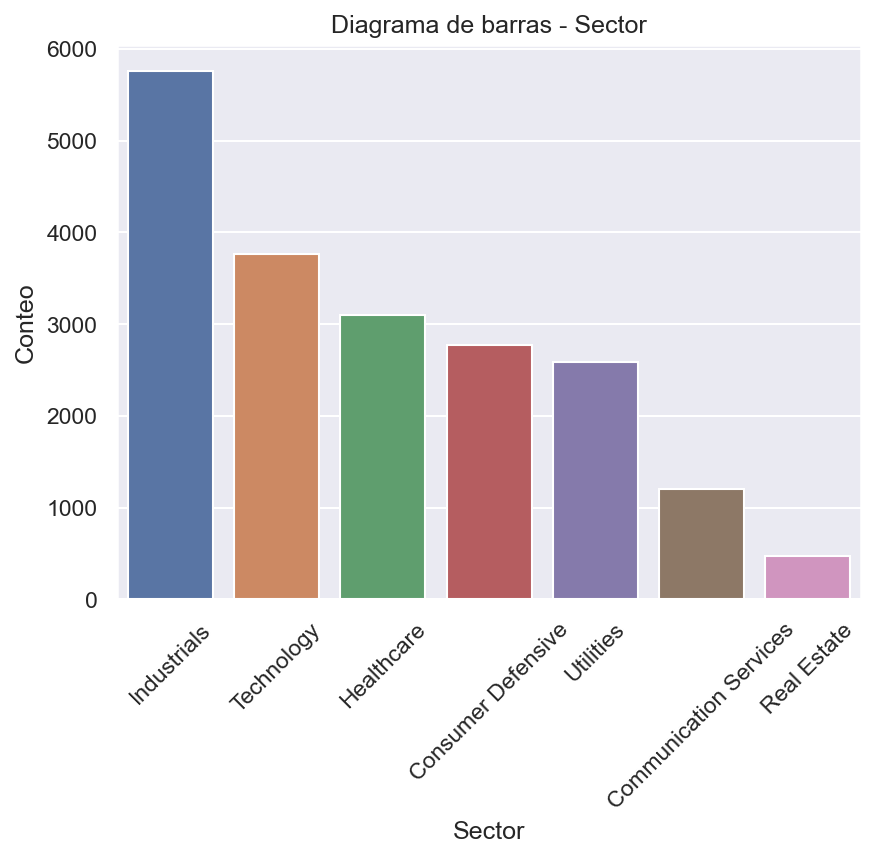

In [31]:
sns.barplot(data=df["Sector"].value_counts().reset_index(), x="Sector", y="count")
plt.title("Diagrama de barras - Sector")
plt.ylabel("Conteo")
plt.xlabel("Sector")
plt.xticks(rotation=45);

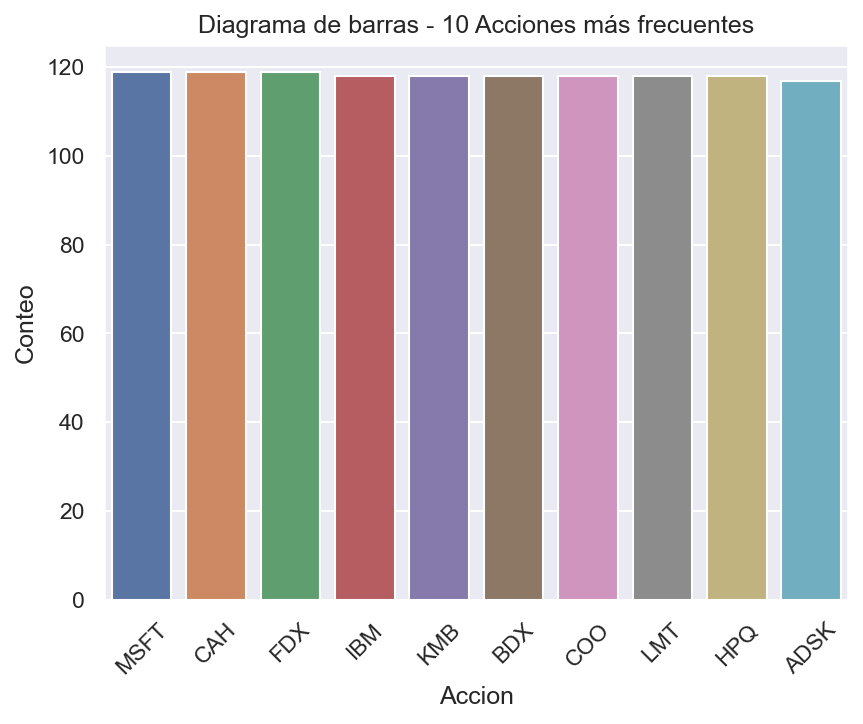

In [32]:
sns.barplot(data=df["Accion"].value_counts().reset_index().head(10), x="Accion", y="count")
plt.title("Diagrama de barras - 10 Acciones más frecuentes")
plt.ylabel("Conteo")
plt.xlabel("Accion")
plt.xticks(rotation=45);

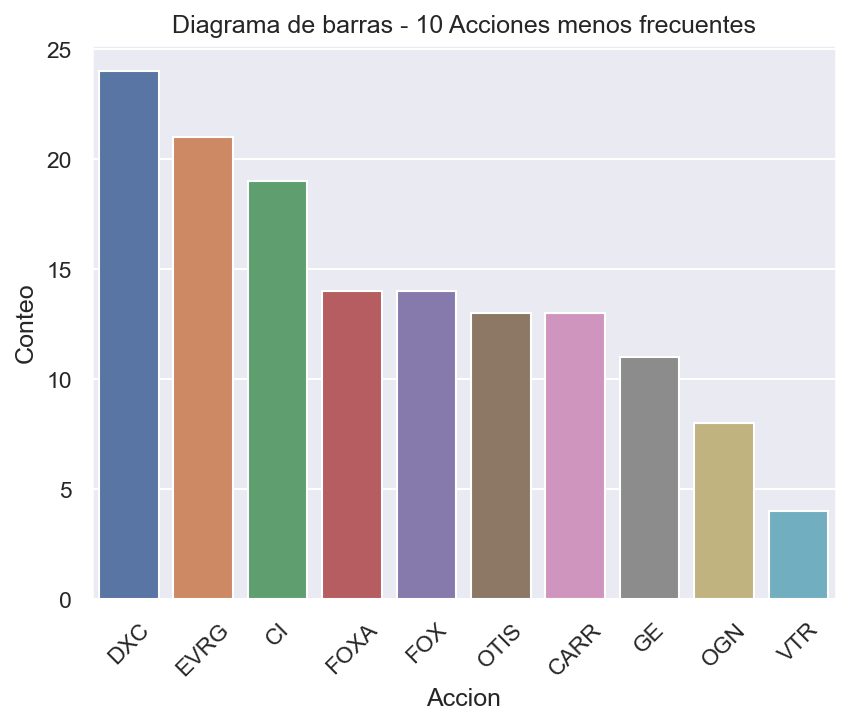

In [33]:
sns.barplot(data=df["Accion"].value_counts().reset_index().tail(10), x="Accion", y="count")
plt.title("Diagrama de barras - 10 Acciones menos frecuentes")
plt.ylabel("Conteo")
plt.xlabel("Accion")
plt.xticks(rotation=45);

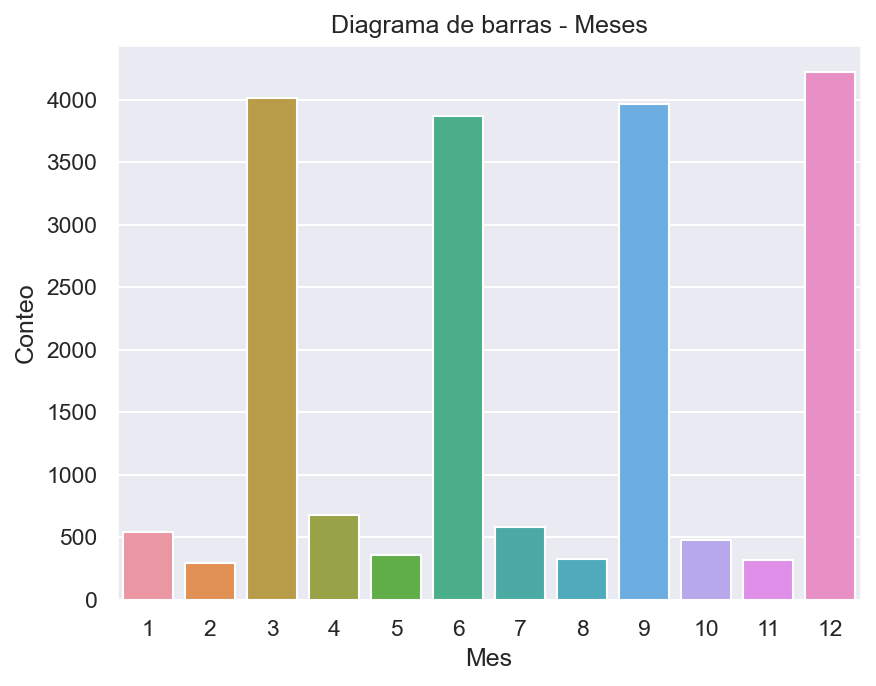

In [34]:
sns.barplot(data=df["Month"].value_counts().reset_index(), x="Month", y="count")
plt.title("Diagrama de barras - Meses")
plt.ylabel("Conteo")
plt.xlabel("Mes");

### Diagrama de Cajas

In [35]:
df.columns

Index(['Date', 'Month', 'Accion', 'EV / Free Cashflow', 'EV / EBITDA',
       'EV / Revenue', 'Total Liabilities / Total Assets',
       'Long Term Liabilities / Total Assets', 'ROIC',
       'Total Current Liabilities / Total Liabilities', 'ROE', 'PER', 'Sector',
       'Year'],
      dtype='object')

In [36]:
def box_plot_percentil(indice, data, inferior, superior):

    """Realiza un box plot de un índice seleccionado teniendo en cuenta solo los valores entre los percentiles seleccionados por el usuario"""

    df_box = data.loc[(data[indice] >= percentiles.loc[inferior, indice]) & (data[indice] <= percentiles.loc[superior, indice]), indice]

    sns.boxplot(df_box)
    plt.title("Diagrama de cajas")
    plt.ylabel(indice)
    plt.xlabel("");

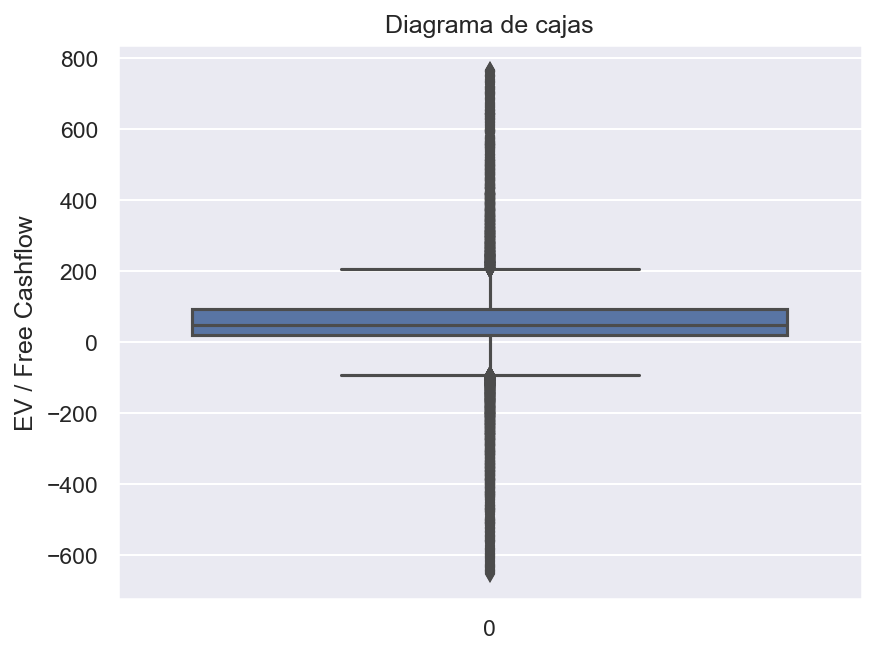

In [37]:
box_plot_percentil("EV / Free Cashflow", df, 2, 98)

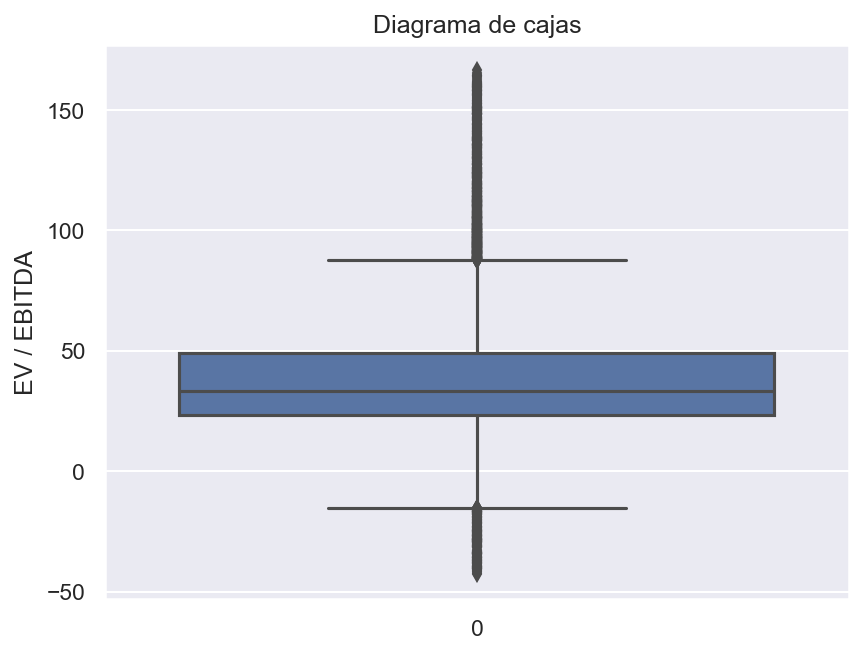

In [38]:
box_plot_percentil("EV / EBITDA", df, 2, 98)

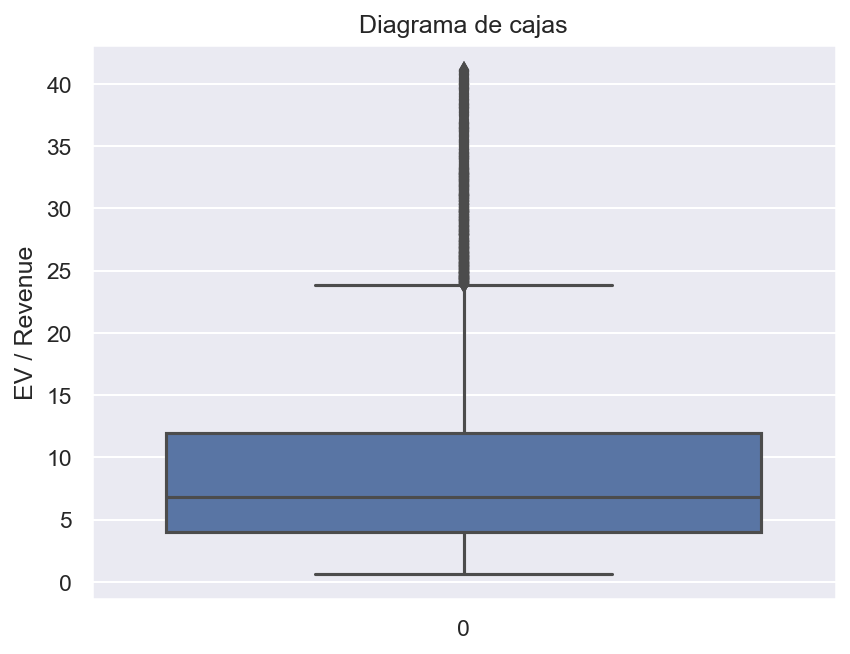

In [39]:
box_plot_percentil("EV / Revenue", df, 2, 98)

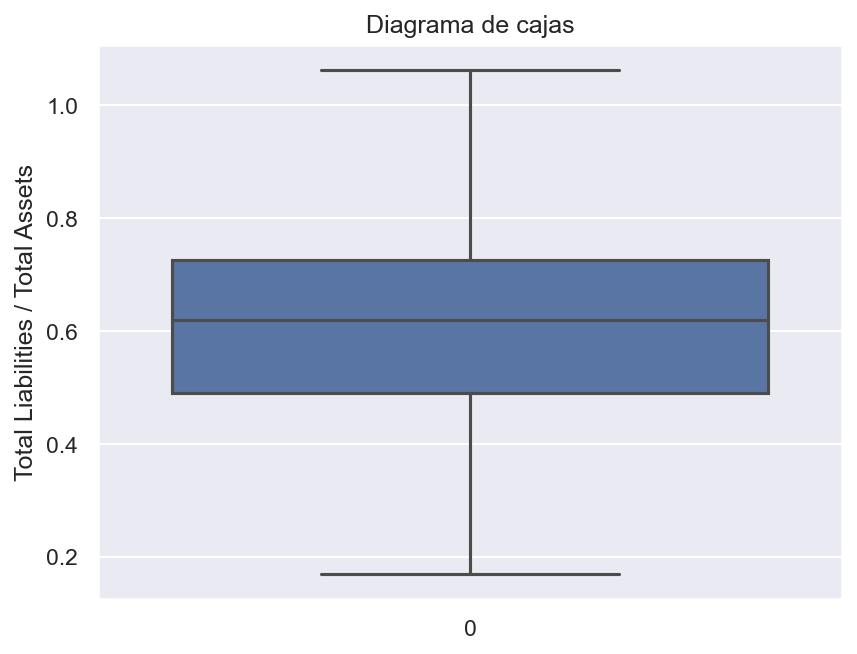

In [40]:
box_plot_percentil("Total Liabilities / Total Assets", df, 2, 98)

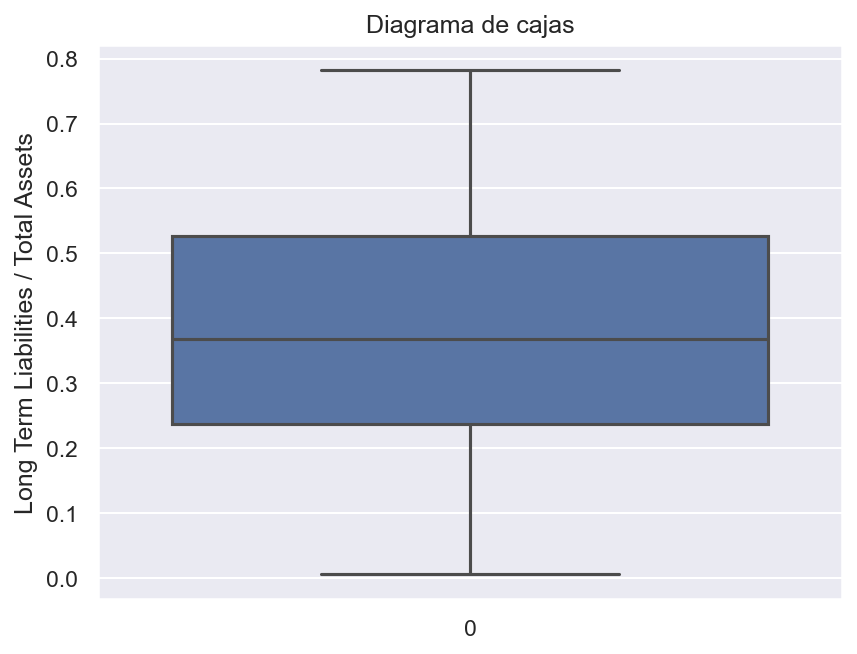

In [41]:
box_plot_percentil("Long Term Liabilities / Total Assets", df, 2, 98)

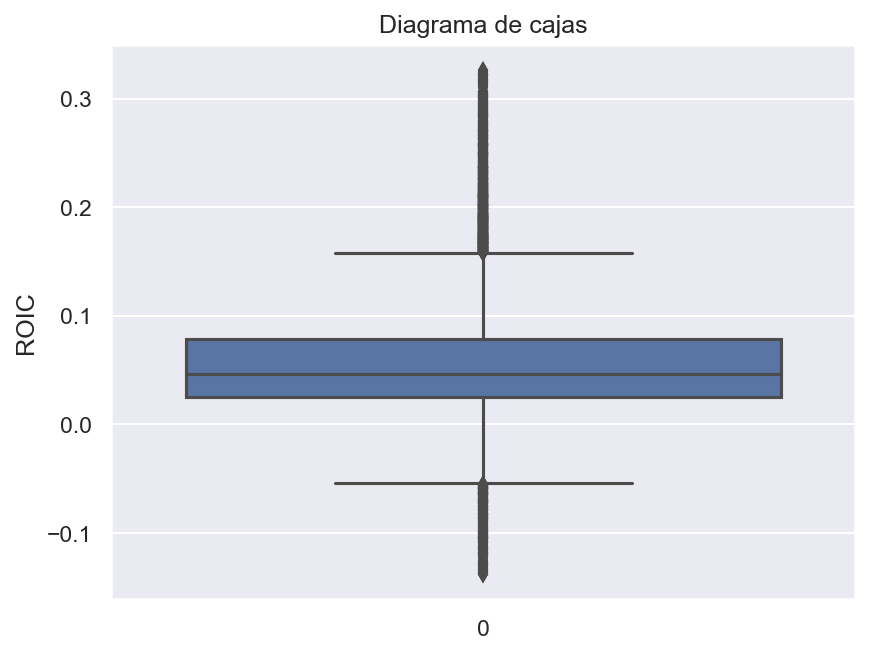

In [42]:
box_plot_percentil("ROIC", df, 2, 98)

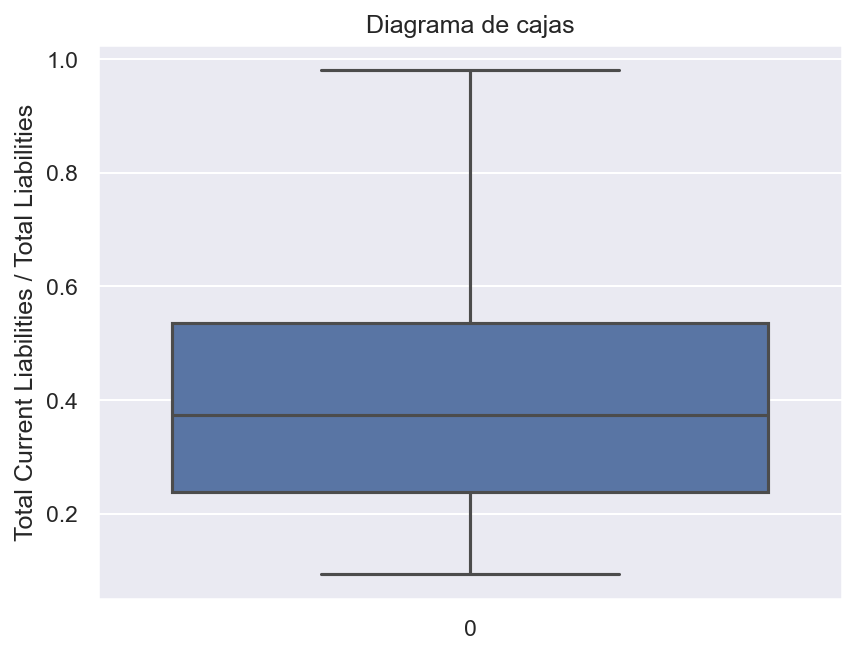

In [43]:
box_plot_percentil("Total Current Liabilities / Total Liabilities", df, 2, 98)

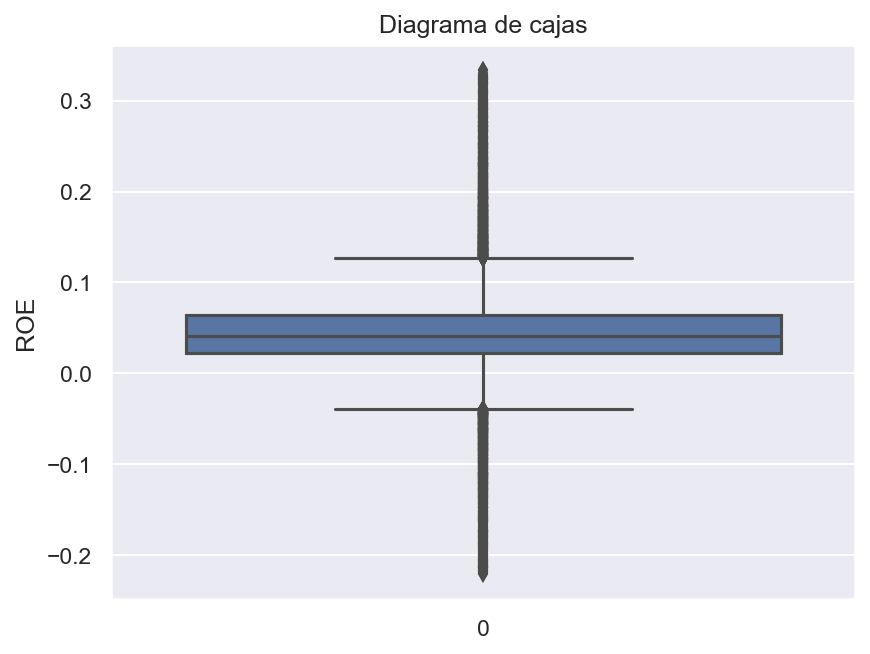

In [44]:
box_plot_percentil("ROE", df, 2, 98)

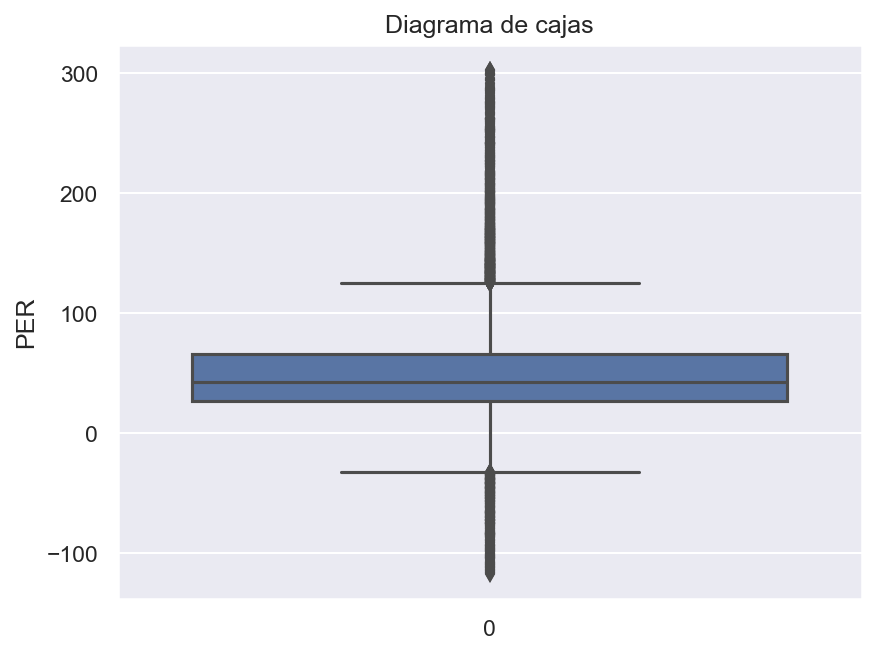

In [45]:
box_plot_percentil("PER", df, 2, 98)

### Matriz de Correlación

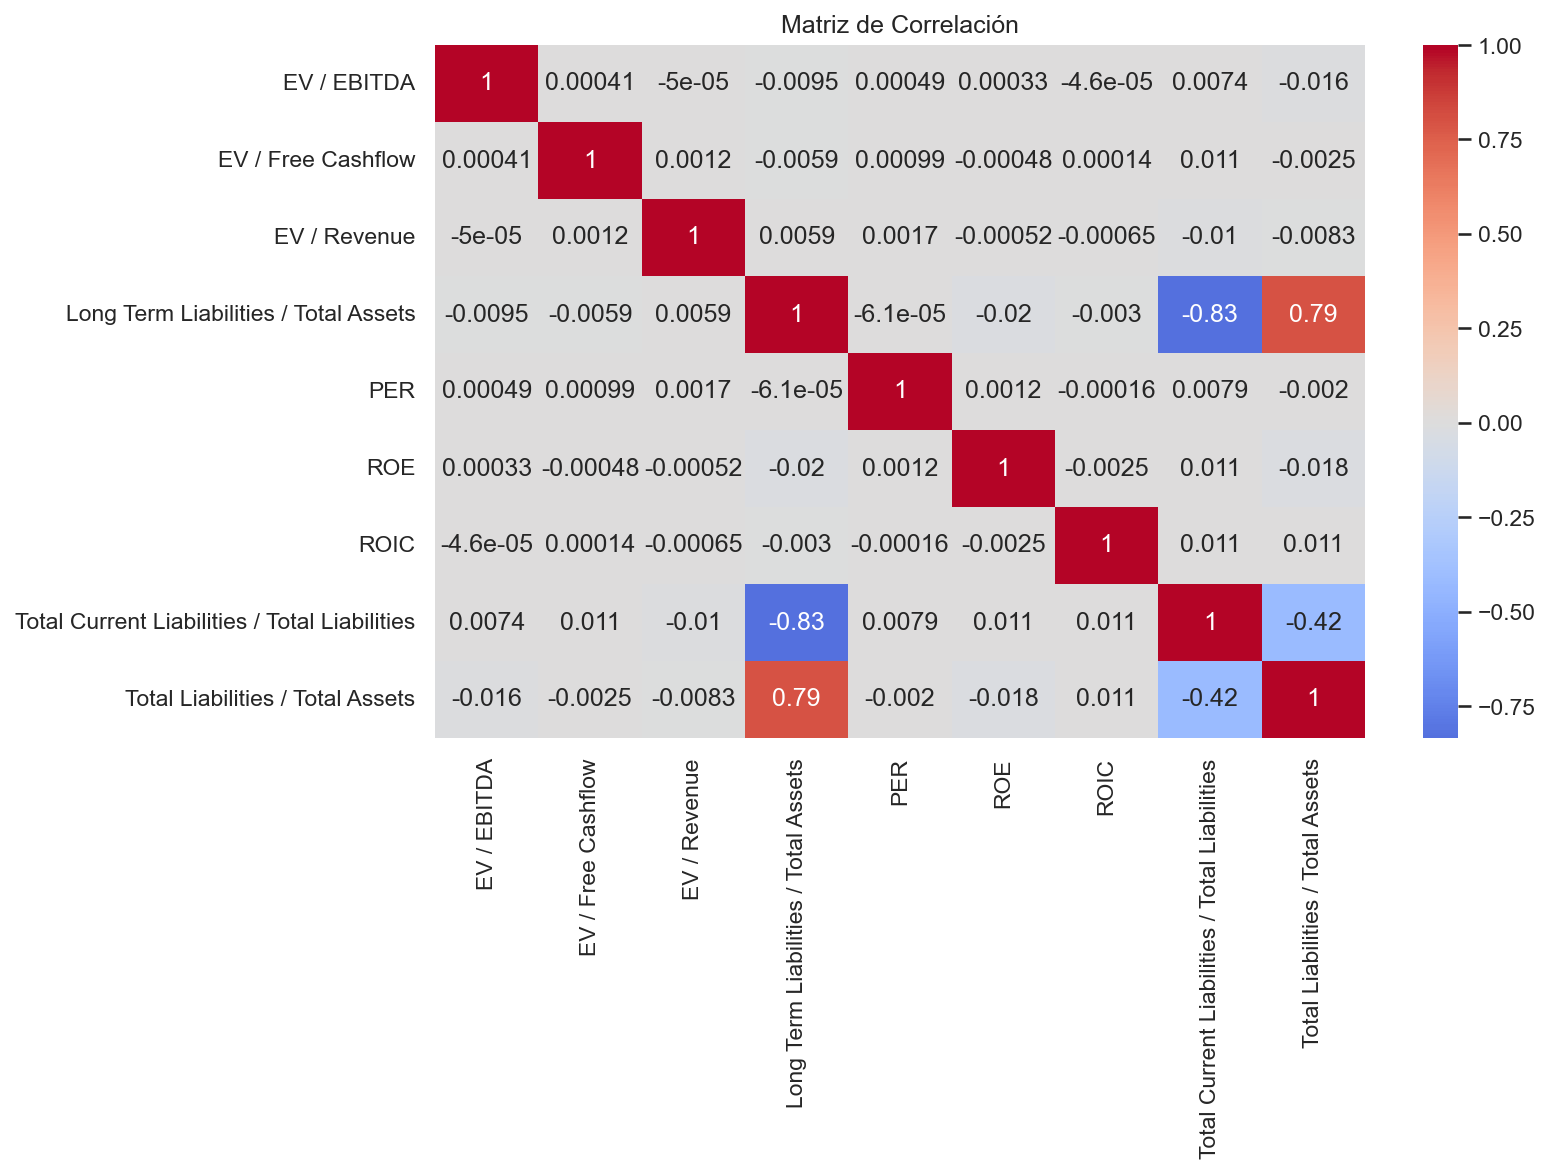

In [46]:
matriz_correlación = df[df.columns.difference(['Date','Month', 'Year'])].corr(numeric_only = True)

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlación, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [47]:
df.drop(columns=["Total Current Liabilities / Total Liabilities", "Total Liabilities / Total Assets"], inplace = True)

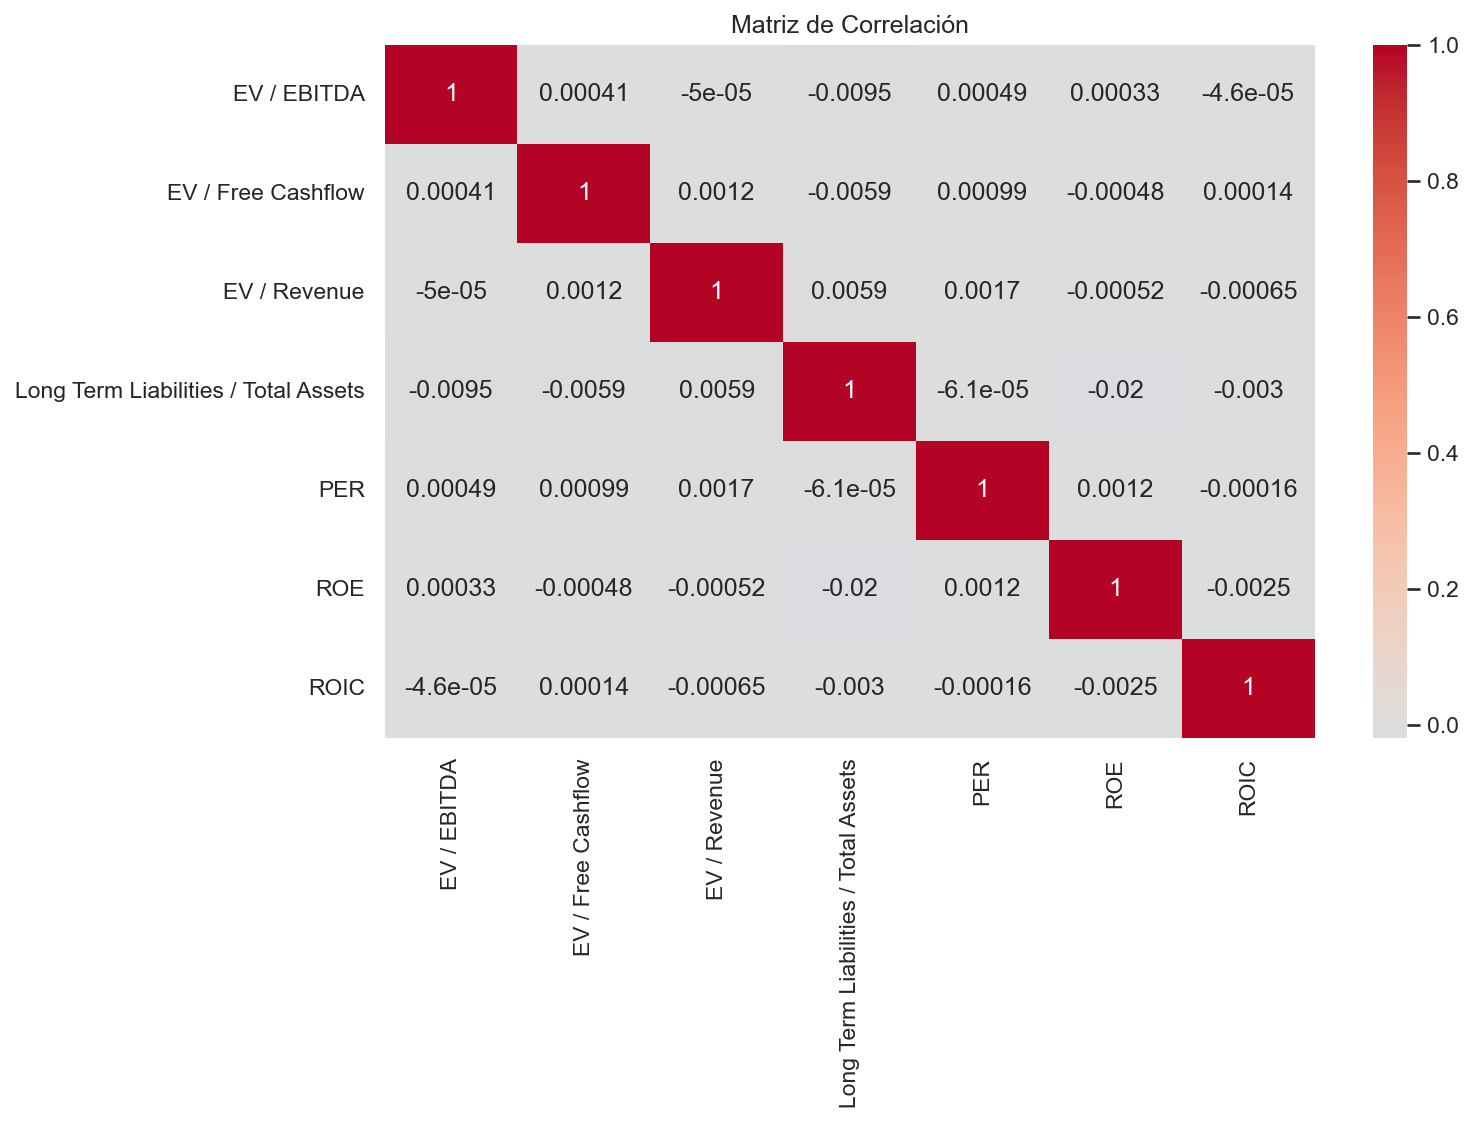

In [48]:
matriz_correlación = df[df.columns.difference(['Date','Month', 'Year'])].corr(numeric_only = True)

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlación, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()